#                                                 * GAS TURBINE *

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.layers import Dropout
from keras.callbacks import LearningRateScheduler
from keras.wrappers.scikit_learn import KerasRegressor
import missingno as msno


/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/1129636344.py:19: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


# EDA

In [2]:
df=pd.read_csv('gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
df.shape

(15039, 11)

In [4]:
numeric_features = df.select_dtypes(include=[np.number])

numeric_features.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [5]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

[]

In [6]:
df.skew(), df.kurt()

(AT     -0.030710
 AP      0.107601
 AH     -0.681224
 AFDP    0.315150
 GTEP    0.370987
 TIT    -1.133744
 TAT    -1.485524
 TEY     0.145963
 CDP     0.263042
 CO      6.534577
 NOX     1.126605
 dtype: float64,
 AT      -0.987597
 AP       0.424070
 AH      -0.282476
 AFDP     0.281642
 GTEP    -0.618358
 TIT      0.375232
 TAT      0.847637
 TEY     -0.487058
 CDP     -0.589420
 CO      82.518116
 NOX      2.660381
 dtype: float64)

In [7]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
correlation = numeric_features.corr()
print(correlation['TEY'].sort_values(ascending = False),'\n')

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64 



In [9]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [10]:
df.describe(include='all')

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


# DATA VISUALISATION 

(array([ 227., 2102.,  794.,  440.,  589., 7060.,  686., 1198., 1610.,
         333.]),
 array([4.60686874, 4.66243736, 4.71800598, 4.77357459, 4.82914321,
        4.88471183, 4.94028045, 4.99584906, 5.05141768, 5.1069863 ,
        5.16255492]),
 <BarContainer object of 10 artists>)

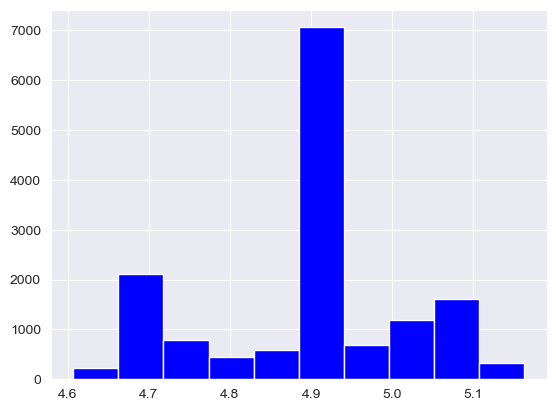

In [11]:
target = np.log(df['TEY'])
target.skew()
plt.hist(target,color='blue')

<Axes: >

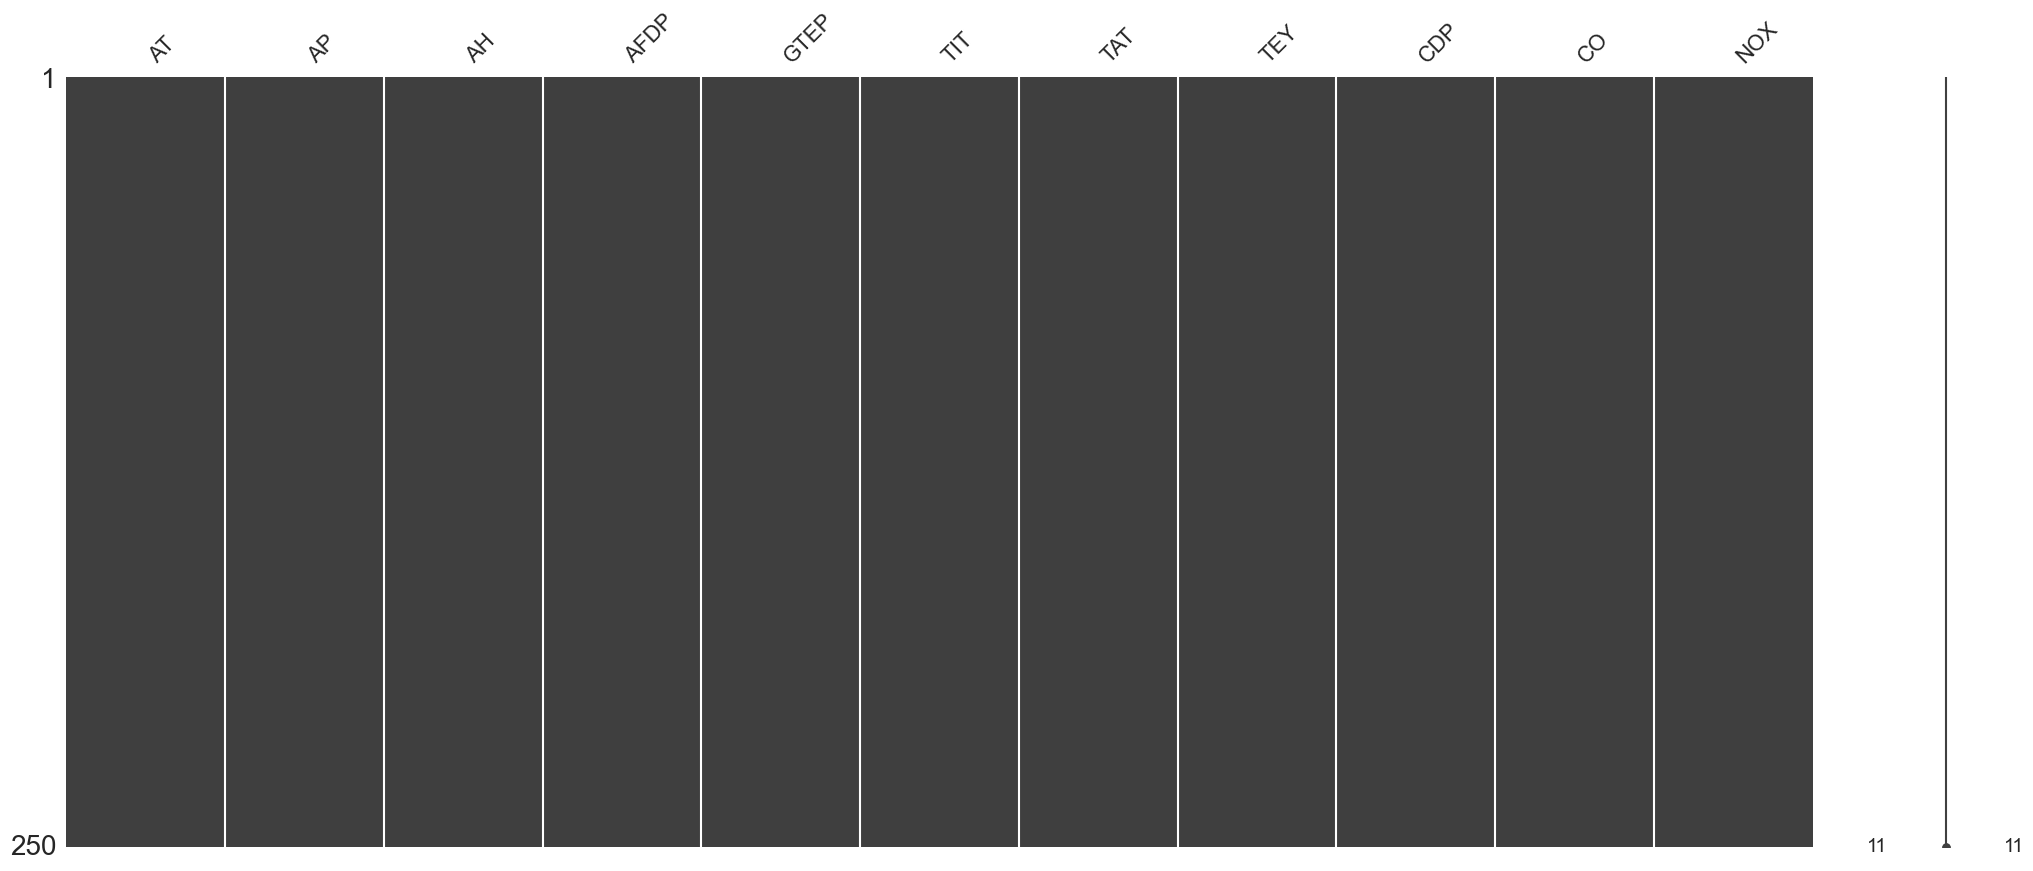

In [12]:
msno.matrix(df.sample(250))
#The missingno correlation heatmap measures nullity correlation: how strongly the 
#presence or absence of one variable affects the presence of another:

<Axes: >

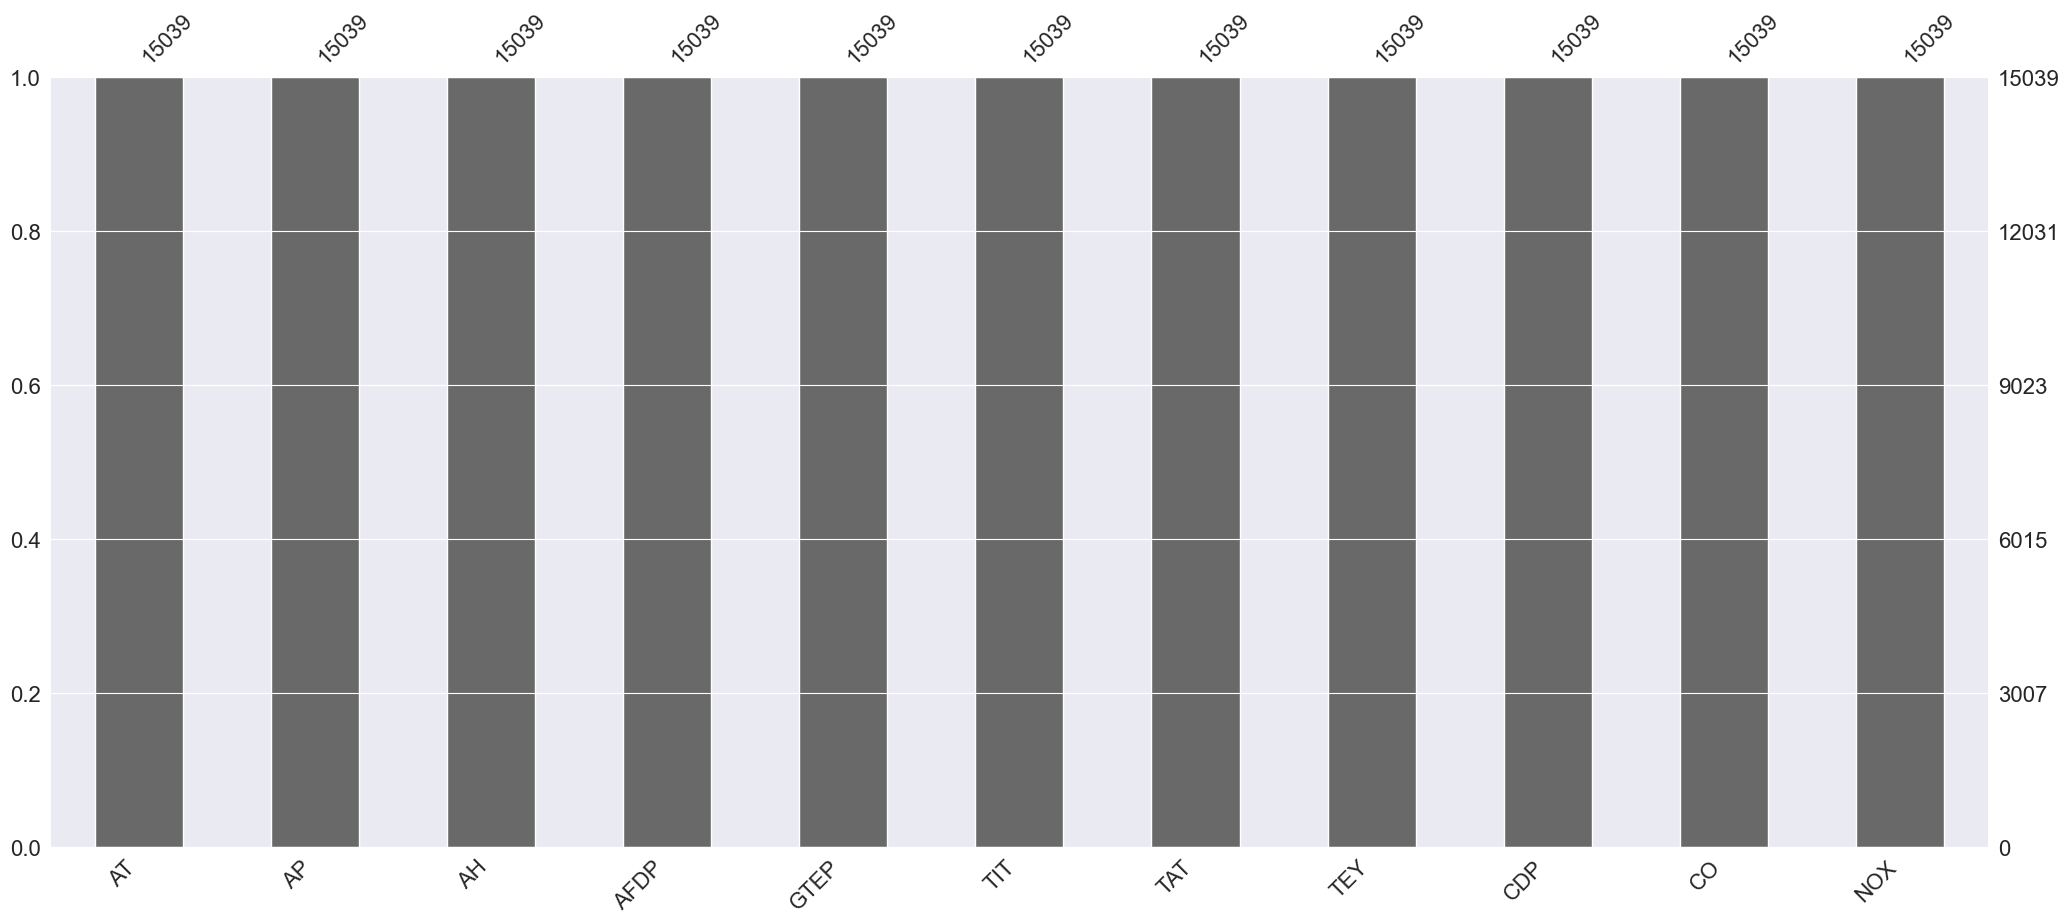

In [13]:
msno.bar(df)

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/3443117763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde=True, label='Skew = %.3f' %(skew), bins=30)


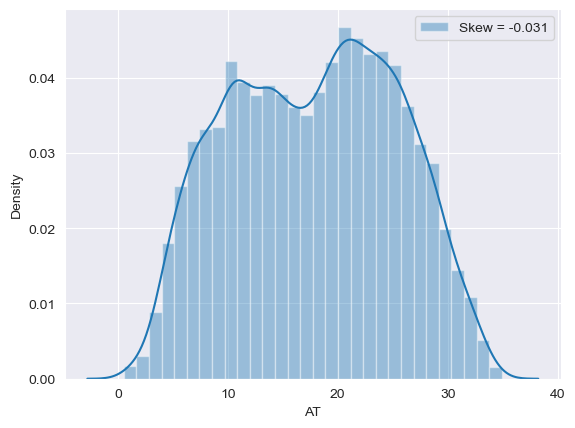

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/3443117763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde=True, label='Skew = %.3f' %(skew), bins=30)


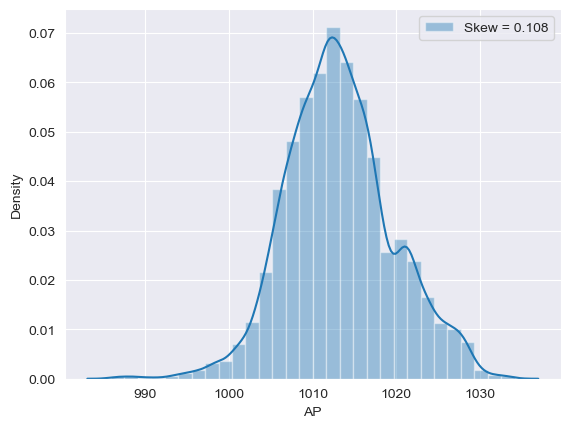

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/3443117763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde=True, label='Skew = %.3f' %(skew), bins=30)


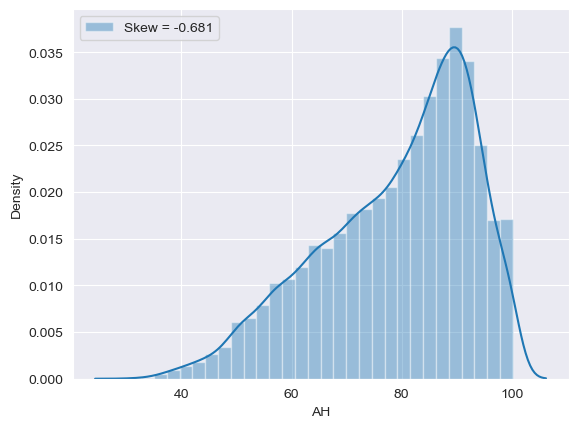

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/3443117763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde=True, label='Skew = %.3f' %(skew), bins=30)


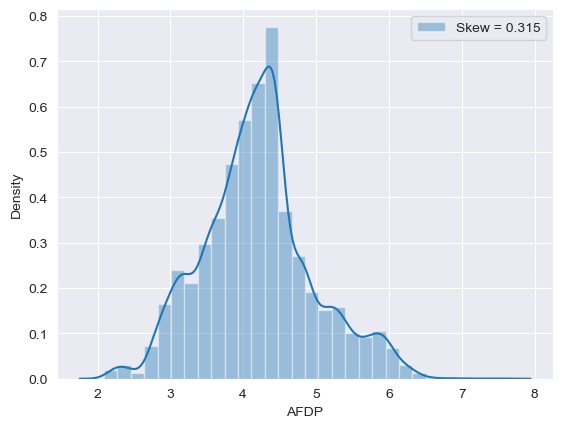

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/3443117763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde=True, label='Skew = %.3f' %(skew), bins=30)


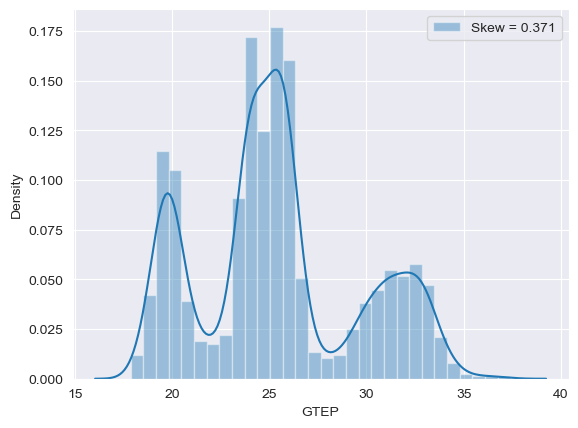

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/3443117763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde=True, label='Skew = %.3f' %(skew), bins=30)


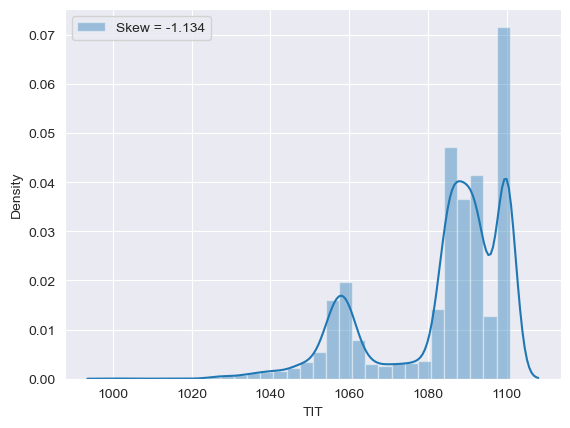

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/3443117763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde=True, label='Skew = %.3f' %(skew), bins=30)


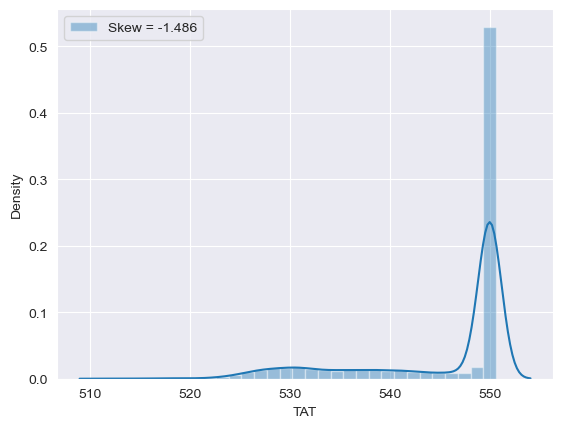

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/3443117763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde=True, label='Skew = %.3f' %(skew), bins=30)


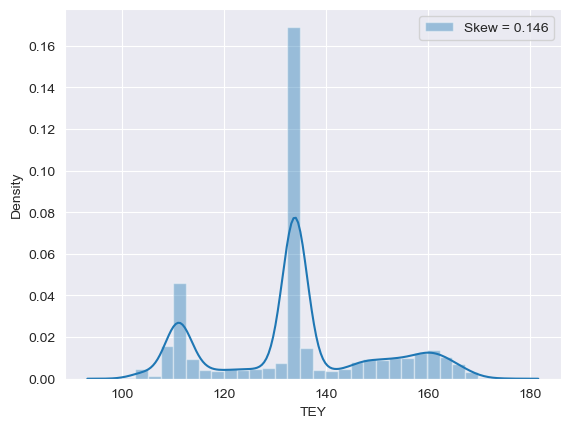

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/3443117763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde=True, label='Skew = %.3f' %(skew), bins=30)


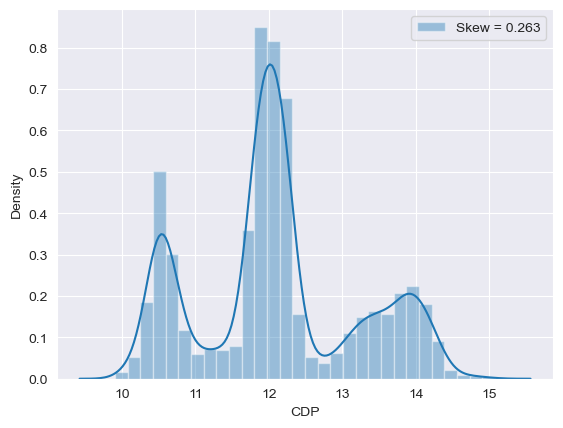

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/3443117763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde=True, label='Skew = %.3f' %(skew), bins=30)


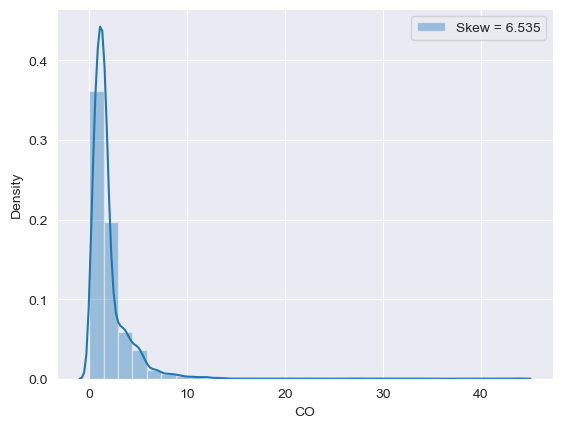

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/3443117763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde=True, label='Skew = %.3f' %(skew), bins=30)


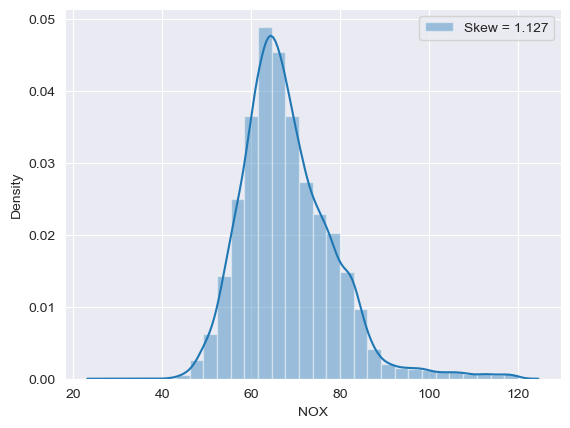

In [14]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=True, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

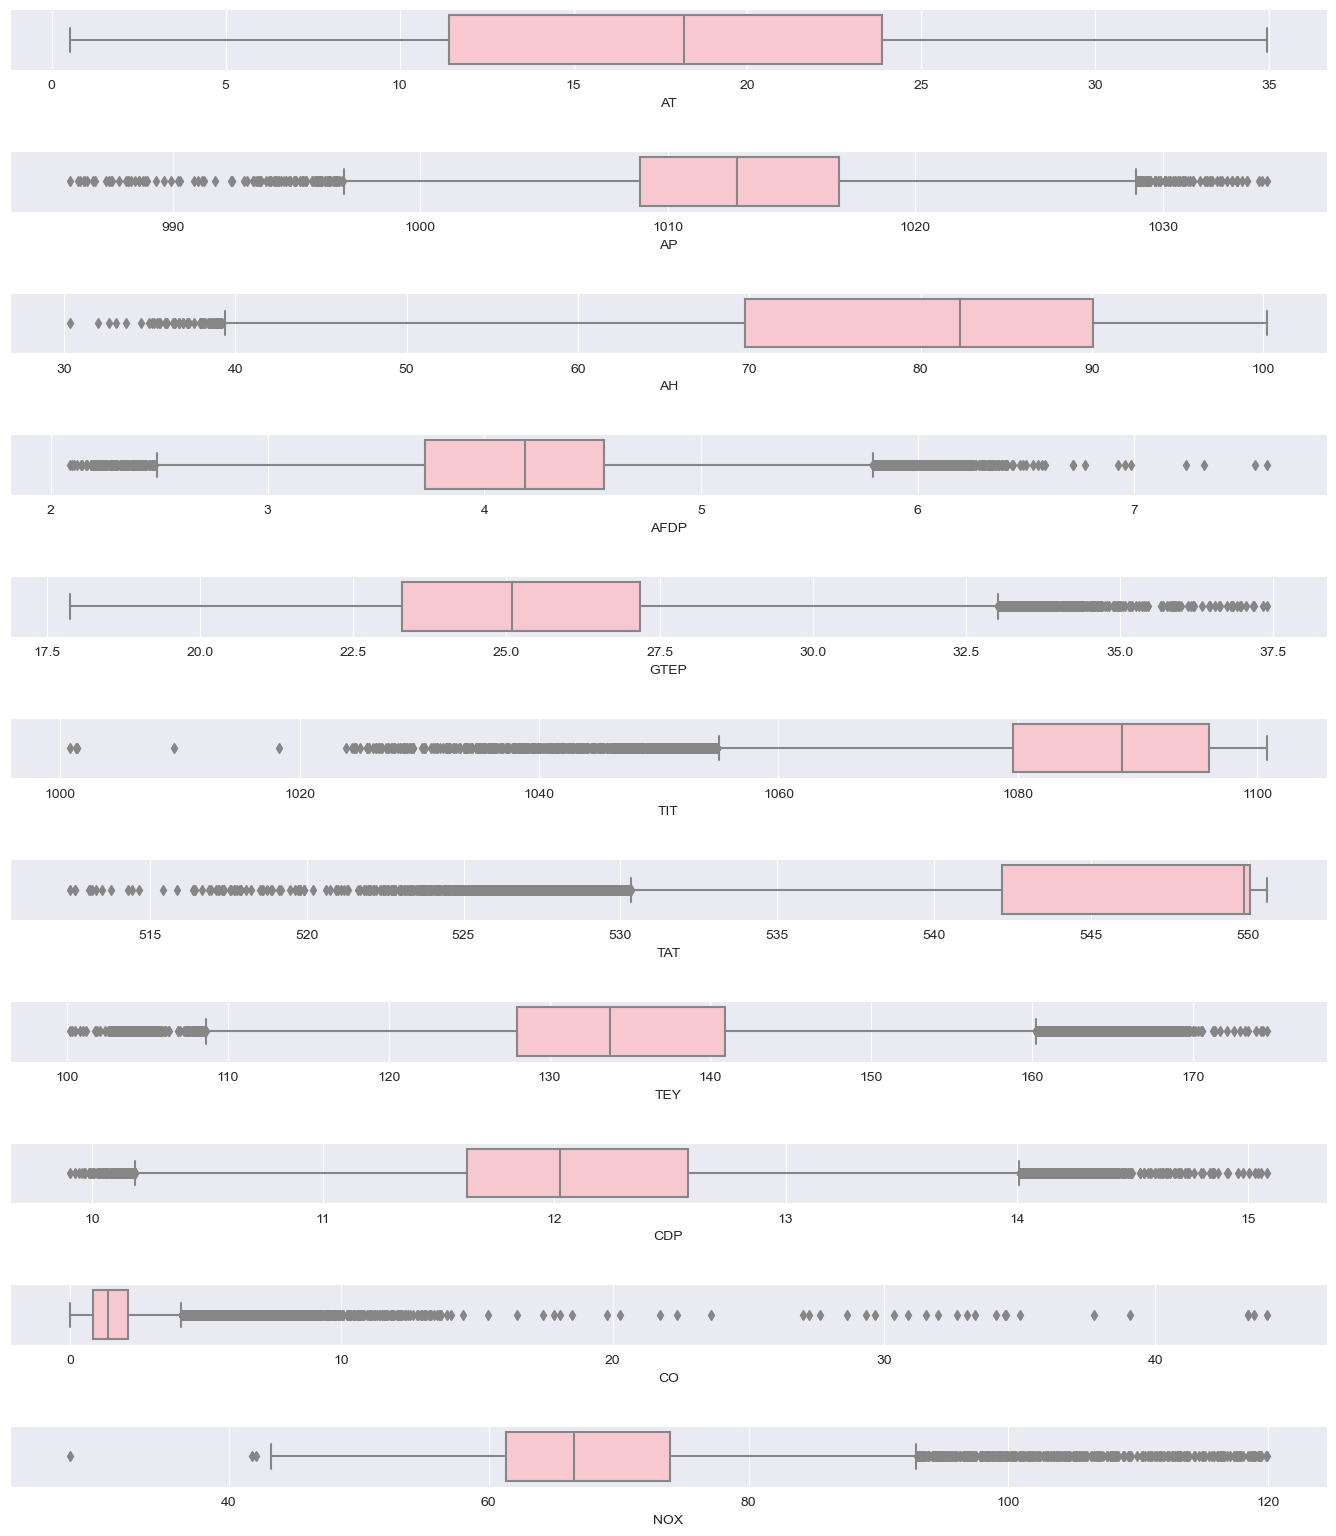

In [15]:
ot=df.copy() 
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=ot,palette=["pink"],ax=axes[0])
sns.boxplot(x='AP',data=ot,palette=["pink"],ax=axes[1])
sns.boxplot(x='AH',data=ot,palette=["pink"],ax=axes[2])
sns.boxplot(x='AFDP',data=ot,palette=["pink"],ax=axes[3])
sns.boxplot(x='GTEP',data=ot,palette=["pink"],ax=axes[4])
sns.boxplot(x='TIT',data=ot,palette=["pink"],ax=axes[5])
sns.boxplot(x='TAT',data=ot,palette=["pink"],ax=axes[6])
sns.boxplot(x='TEY',data=ot,palette=["pink"],ax=axes[7])
sns.boxplot(x='CDP',data=ot,palette=["pink"],ax=axes[8])
sns.boxplot(x='CO',data=ot,palette=["pink"],ax=axes[9])
sns.boxplot(x='NOX',data=ot,palette=["pink"],ax=axes[10])
plt.tight_layout(pad=3.0)

<Axes: >

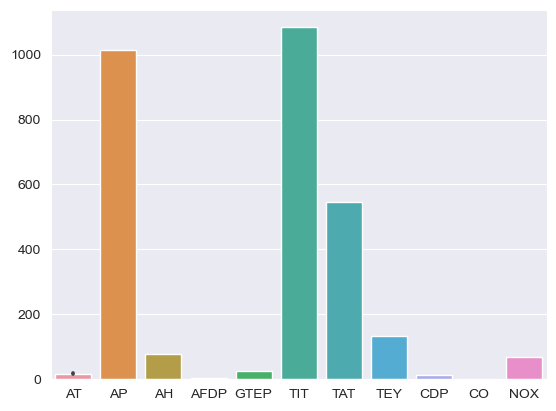

In [16]:
sns.barplot(data=df)

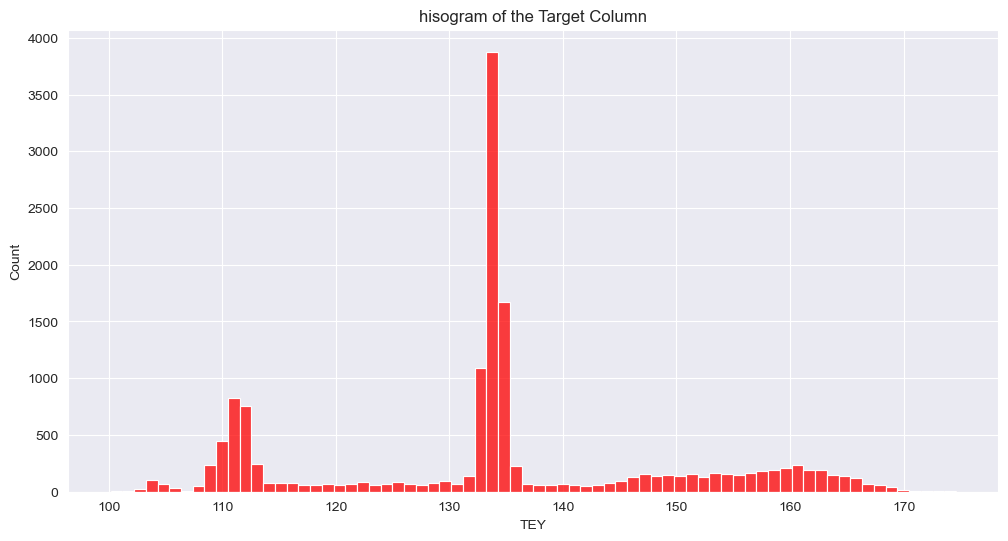

In [17]:
plt.figure(figsize = (12,6))
sns.histplot(df['TEY'],color='r')
plt.title("hisogram of the Target Column")
plt.show()

Text(0.5, 1.0, 'Cumulative of the Target Column')

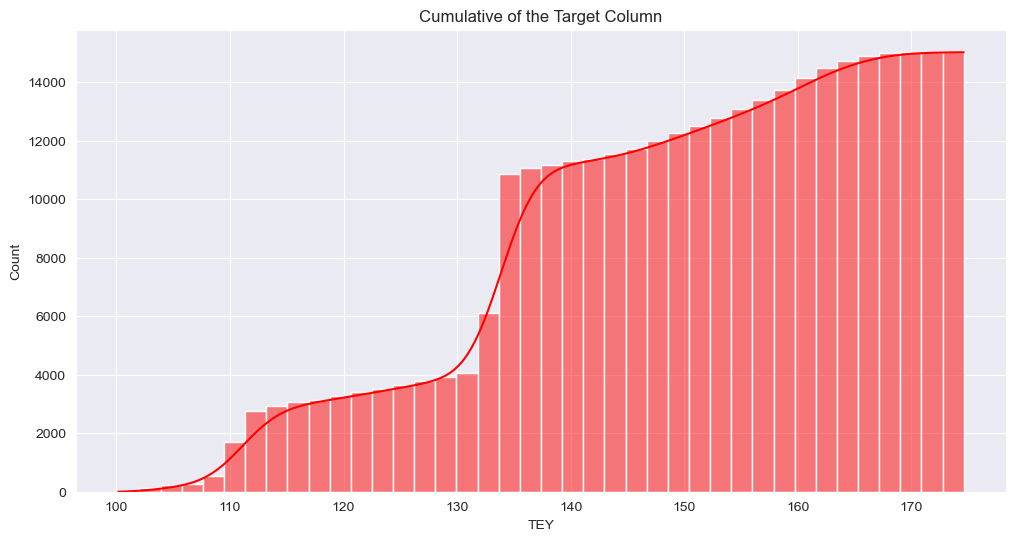

In [18]:
plt.figure(figsize = (12,6))
sns.histplot(df["TEY"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

Index(['TEY', 'CDP', 'GTEP', 'TIT', 'AFDP', 'AP', 'NOX', 'AH', 'AT', 'CO'], dtype='object')


<Axes: >

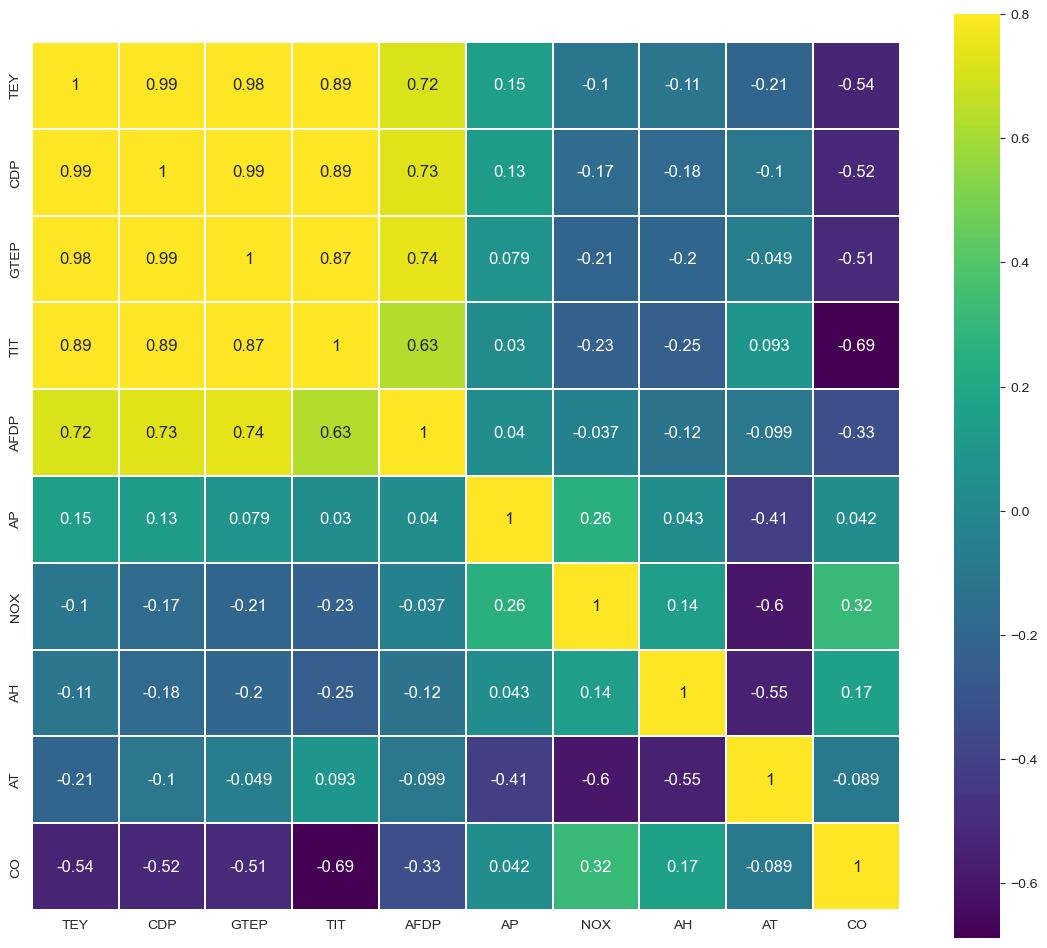

In [19]:
#Here, nlargest() function from pandas is used to return the k largest values of the 'TEY' column. 
#These k features are then selected and their correlation coefficients are calculated and plotted using a heatmap.

k= 10
cols = correlation.nlargest(k,'TEY')['TEY'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

# STANDARDISING THE DATASET

In [20]:
scaler = StandardScaler()
standard_df=scaler.fit_transform(df)
df1=pd.DataFrame(standard_df, columns=df.columns)

In [21]:
df1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


# MODEL BUILDING

In [22]:
X = df1.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= df1.loc[:,['TEY']]

In [23]:
X.head(4)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878


In [24]:
y.head(4)

,TEY
0,-1.231172
1,-1.229909
2,-1.230541
3,-1.229909


In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [26]:
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Metal device set to: Apple M1


2023-03-26 11:33:30.335475: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-26 11:33:30.335590: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                132       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10


2023-03-26 11:33:30.509233: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-26 11:33:30.712151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1053/1053 [==============================] - 7s 7ms/step - loss: -100.3552 - accuracy: 0.0000e+00
Epoch 2/10
1053/1053 [==============================] - 8s 8ms/step - loss: -1408.2775 - accuracy: 0.0000e+00
Epoch 3/10
1053/1053 [==============================] - 7s 7ms/step - loss: -5215.8521 - accuracy: 0.0000e+00
Epoch 4/10
1053/1053 [==============================] - 7s 7ms/step - loss: -12077.8359 - accuracy: 0.0000e+00
Epoch 5/10
1053/1053 [==============================] - 7s 7ms/step - loss: -22407.6836 - accuracy: 0.0000e+00
Epoch 6/10
1053/1053 [==============================] - 7s 6ms/step - loss: -36624.9414 - accuracy: 0.0000e+00
Epoch 7/10
1053/1053 [==============================] - 6s 6ms/step - loss: -55037.4727 - accuracy: 0.0000e+00
Epoch 8/10
1053/1053 [==============================] - 6s 6ms/step - loss: -78027.2812 - accuracy: 0.0000e+00
Epoch 9/10
1053/1053 [==============================] - 7s 6ms/step - loss: -105979.8203 - accuracy: 0.0000e+00
Epoch 10/10
105

In [30]:
result = model.evaluate(x=X_test,y=y_test)
result

 29/141 [=====>........................] - ETA: 0s - loss: -151516.0781 - accuracy: 0.0000e+00

2023-03-26 11:34:40.424491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


141/141 [==============================] - 1s 4ms/step - loss: -148650.4688 - accuracy: 0.0000e+00


[-148650.46875, 0.0]

In [31]:
print('Model Accuracy : ',round(result[1],2))
print('Loss           : ',round(result[0],2))

Model Accuracy :  0.0
Loss           :  -148650.47


In [32]:
model2 = Sequential()
model2.add(Dense(12, input_dim=10, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='relu'))

In [33]:
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [34]:
model2.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
  10/1053 [..............................] - ETA: 6s - loss: 1.3845 - accuracy: 0.0000e+00  

2023-03-26 11:34:41.160813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1053/1053 [==============================] - 6s 6ms/step - loss: 0.5454 - accuracy: 0.0000e+00
Epoch 2/50
1053/1053 [==============================] - 6s 6ms/step - loss: 0.4904 - accuracy: 0.0000e+00
Epoch 3/50
1053/1053 [==============================] - 6s 5ms/step - loss: 0.4882 - accuracy: 0.0000e+00
Epoch 4/50
1053/1053 [==============================] - 6s 6ms/step - loss: 0.4876 - accuracy: 0.0000e+00
Epoch 5/50
1053/1053 [==============================] - 6s 5ms/step - loss: 0.4874 - accuracy: 0.0000e+00
Epoch 6/50
1053/1053 [==============================] - 5s 5ms/step - loss: 0.4872 - accuracy: 0.0000e+00
Epoch 7/50
1053/1053 [==============================] - 6s 5ms/step - loss: 0.4872 - accuracy: 0.0000e+00
Epoch 8/50
1053/1053 [==============================] - 6s 5ms/step - loss: 0.4871 - accuracy: 0.0000e+00
Epoch 9/50
1053/1053 [==============================] - 6s 6ms/step - loss: 0.4871 - accuracy: 0.0000e+00
Epoch 10/50
1053/1053 [==============================] - 

In [35]:
result = model2.evaluate(x=X_test,y=y_test)
result

 17/141 [==>...........................] - ETA: 0s - loss: 0.5027 - accuracy: 0.0000e+00

2023-03-26 11:39:53.097126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


141/141 [==============================] - 1s 4ms/step - loss: 0.4598 - accuracy: 0.0000e+00


[0.4598183333873749, 0.0]

In [36]:
print('Model2 Accuracy : ',round(result[1],2))
print('Loss           : ',round(result[0],2))

Model2 Accuracy :  0.0
Loss           :  0.46


In [37]:
model3 = Sequential()
model3.add(Dense(12, input_dim=10, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='relu'))

In [38]:
model3.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [39]:
print('Model3 Accuracy : ',round(result[1],2))
print('Loss           : ',round(result[0],2))

Model3 Accuracy :  0.0
Loss           :  0.46


In [40]:
model4 = Sequential()
model4.add(Dense(12, input_dim=10, activation='relu'))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(1, activation='relu'))

In [41]:
model4.compile(loss='mean_squared_logarithmic_error', optimizer='sgd', metrics=['accuracy'])

In [42]:
print('Model4 Accuracy : ',round(result[1],2))
print('Loss           : ',round(result[0],2))

Model4 Accuracy :  0.0
Loss           :  0.46


In [43]:
model4.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
  10/1053 [..............................] - ETA: 6s - loss: 0.1448 - accuracy: 0.0000e+00  

2023-03-26 11:39:53.901765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1053/1053 [==============================] - 6s 5ms/step - loss: 0.0209 - accuracy: 0.0000e+00
Epoch 2/10
1053/1053 [==============================] - 6s 5ms/step - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 3/10
1053/1053 [==============================] - 7s 7ms/step - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 4/10
1053/1053 [==============================] - 8s 8ms/step - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 5/10
1053/1053 [==============================] - 8s 7ms/step - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 6/10
1053/1053 [==============================] - 6s 6ms/step - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 7/10
1053/1053 [==============================] - 6s 5ms/step - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 8/10
1053/1053 [==============================] - 6s 6ms/step - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 9/10
1053/1053 [==============================] - 6s 6ms/step - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 10/10
1053/1053 [==============================] - 

# HYPER PARAMETER TUNING 

In [44]:
#This code is using Keras Tuner to perform hyperparameter tuning on a neural network model.
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')

INFO:tensorflow:Reloading Oracle from existing project project/Gas Turbine/oracle.json
INFO:tensorflow:Reloading Tuner from project/Gas Turbine/tuner0.json


In [45]:
#The tuner.search_space_summary() 
#function prints out a summary of the hyperparameters 
#that will be tuned during the search.
tuner.search_space_summary()

Search space summary
Default search space size: 20
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [46]:
# below function is being used to search for the best 
#hyperparameters given a set of training and validation data.
tuner.search(X_train, y_train,epochs=50,validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [47]:
tuner.results_summary()

Results summary
Results in project/Gas Turbine
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 18
units_0: 96
units_1: 64
learning_rate: 0.0001
units_2: 96
units_3: 64
units_4: 64
units_5: 64
units_6: 32
units_7: 96
units_8: 64
units_9: 64
units_10: 32
units_11: 64
units_12: 64
units_13: 96
units_14: 64
units_15: 32
units_16: 32
units_17: 32
Score: 0.31772581736246747
Trial summary
Hyperparameters:
num_layers: 9
units_0: 96
units_1: 64
learning_rate: 0.0001
units_2: 32
units_3: 64
units_4: 64
units_5: 96
units_6: 64
units_7: 64
units_8: 64
units_9: 96
Score: 0.5319622357686361
Trial summary
Hyperparameters:
num_layers: 2
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 64
units_4: 64
units_5: 64
units_6: 64
units_7: 64
units_8: 64
units_9: 64
Score: 0.539632260799408
Trial summary
Hyperparameters:
num_layers: 8
units_0: 96
units_1: 64
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
Score: 0.5617114106814066

The last trial had 14 layers, with the number of units ranging from 32 to 96 and a learning rate of 0.01, which resulted in the highest score of 0.8812325398127238.

 it can be inferred that a neural network model with more layers and more number of units tends to perform better, but it also depends on the choice of the learning rate

# FOREST FIRE 

PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


# EDA

In [48]:
df= pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [50]:
df.shape

(517, 31)

In [51]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [52]:
df.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [53]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [54]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
df.skew(), df.kurt()

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/2428959278.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(), df.kurt()
/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/2428959278.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(), df.kurt()


(FFMC        -6.575606
 DMC          0.547498
 DC          -1.100445
 ISI          2.536325
 temp        -0.331172
 RH           0.862904
 wind         0.571001
 rain        19.816344
 area        12.846934
 dayfri       1.816105
 daymon       2.043956
 daysat       1.835290
 daysun       1.637920
 daythu       2.375268
 daytue       2.291255
 daywed       2.594172
 monthapr     7.401340
 monthaug     0.603696
 monthdec     7.401340
 monthfeb     4.798308
 monthjan    16.031038
 monthjul     3.646828
 monthjun     5.254127
 monthmar     2.594172
 monthmay    16.031038
 monthnov    22.737634
 monthoct     5.628522
 monthsep     0.712255
 dtype: float64,
 FFMC         67.066041
 DMC           0.204822
 DC           -0.245244
 ISI          21.458037
 temp          0.136166
 RH            0.438183
 wind          0.054324
 rain        421.295964
 area        194.140721
 dayfri        1.303265
 daymon        2.186198
 daysat        1.373589
 daysun        0.685418
 daythu        3.656027
 da

In [56]:

numeric_features = df.select_dtypes(include=[np.number])

numeric_features.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep'],
      dtype='object')

In [57]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

['month', 'day', 'size_category']

In [58]:
df.corr()

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


# DATA VISUALISATION 

<Axes: >

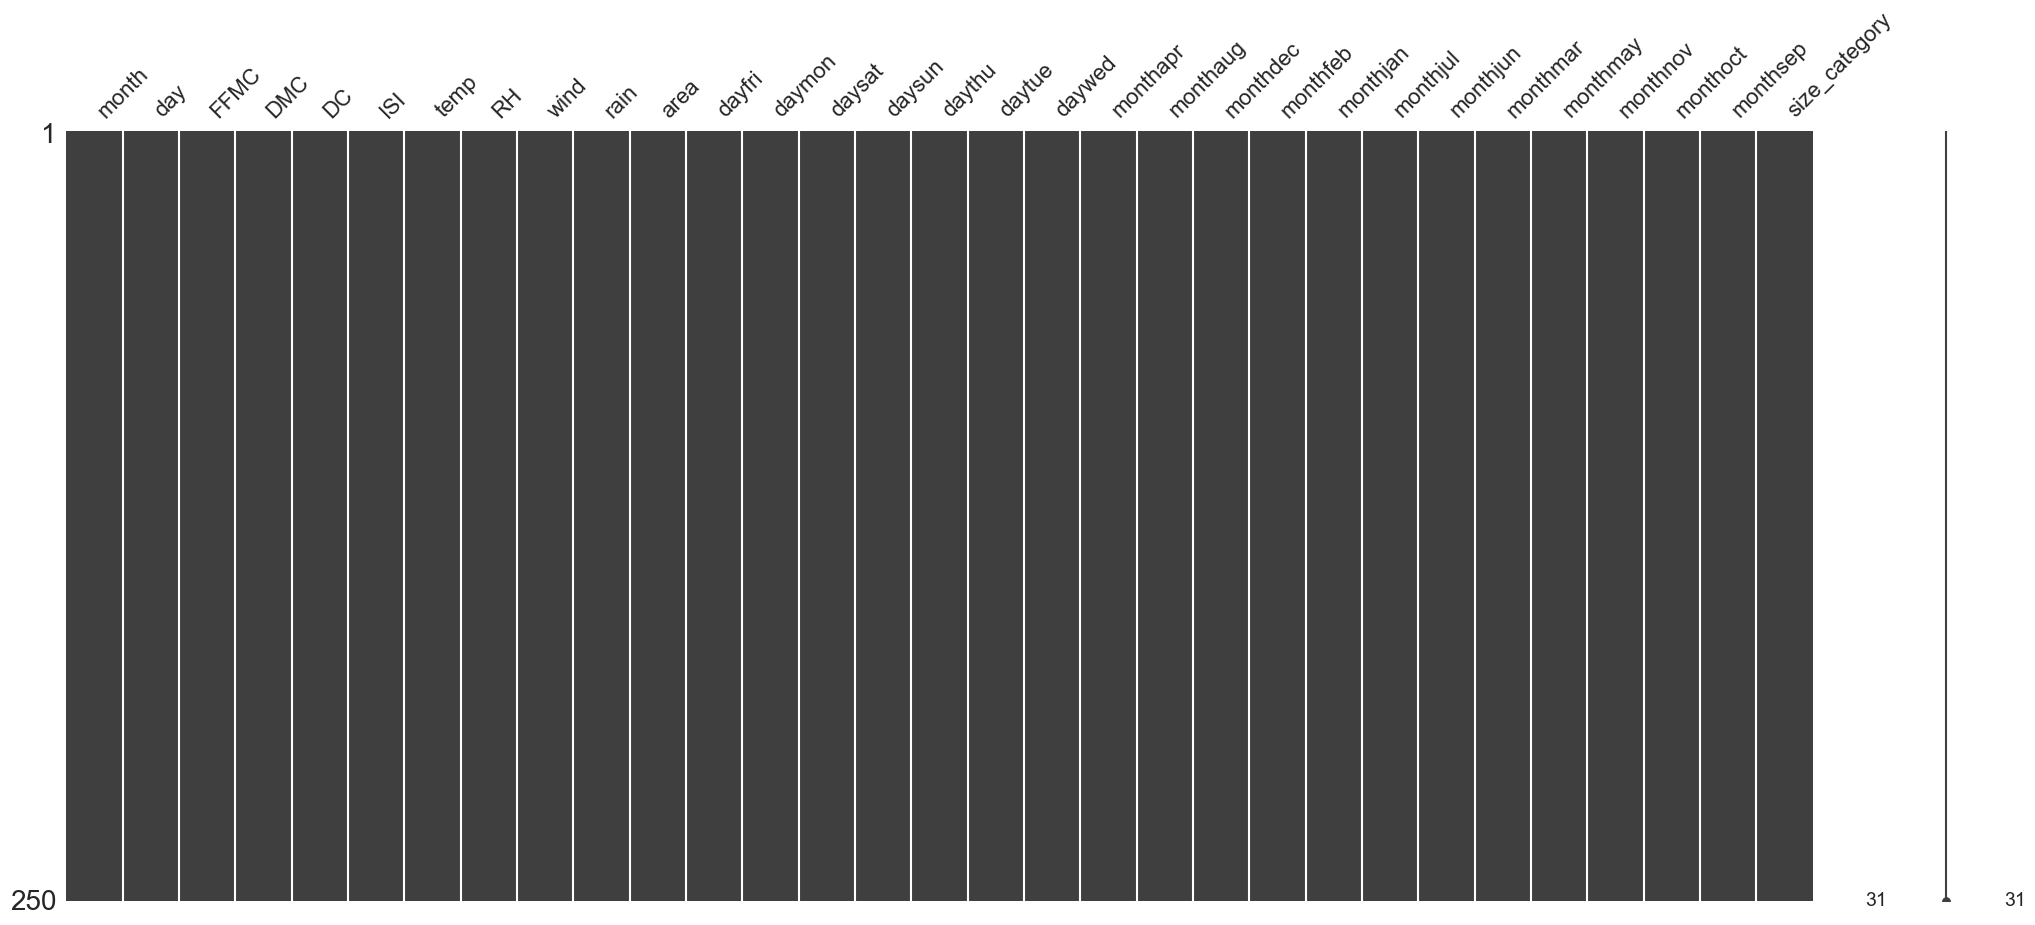

In [59]:
msno.matrix(df.sample(250))

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/1290323436.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.distplot(df.skew(),color='blue',axlabel ='Skewness')
/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/1290323436.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.skew(),color='blue',axlabel ='Skewness')


<Axes: xlabel='Skewness', ylabel='Density'>

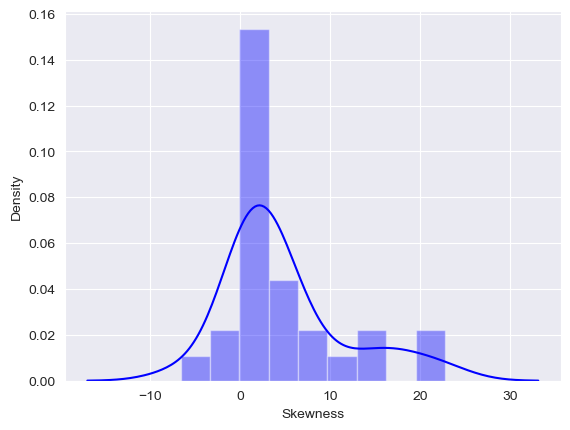

In [60]:
sns.distplot(df.skew(),color='blue',axlabel ='Skewness')

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/3046955554.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.distplot(df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/3046955554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = T

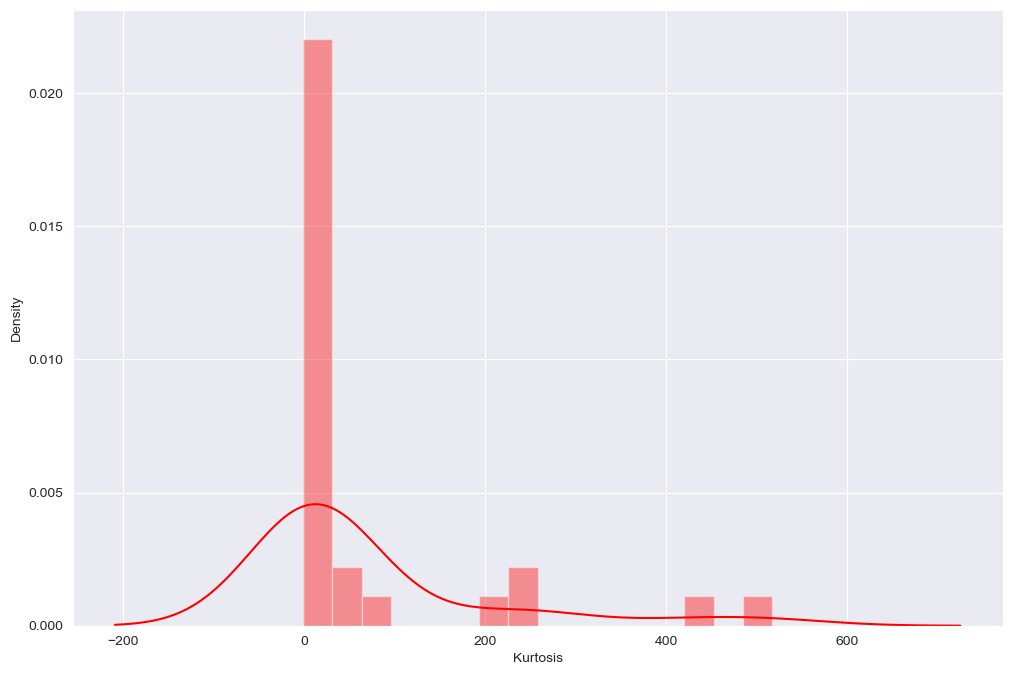

In [61]:
plt.figure(figsize = (12,8))
sns.distplot(df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
#plt.hist(train.kurt(),orientation = 'vertical',histtype = 'bar',label ='Kurtosis', color ='blue')
plt.show()

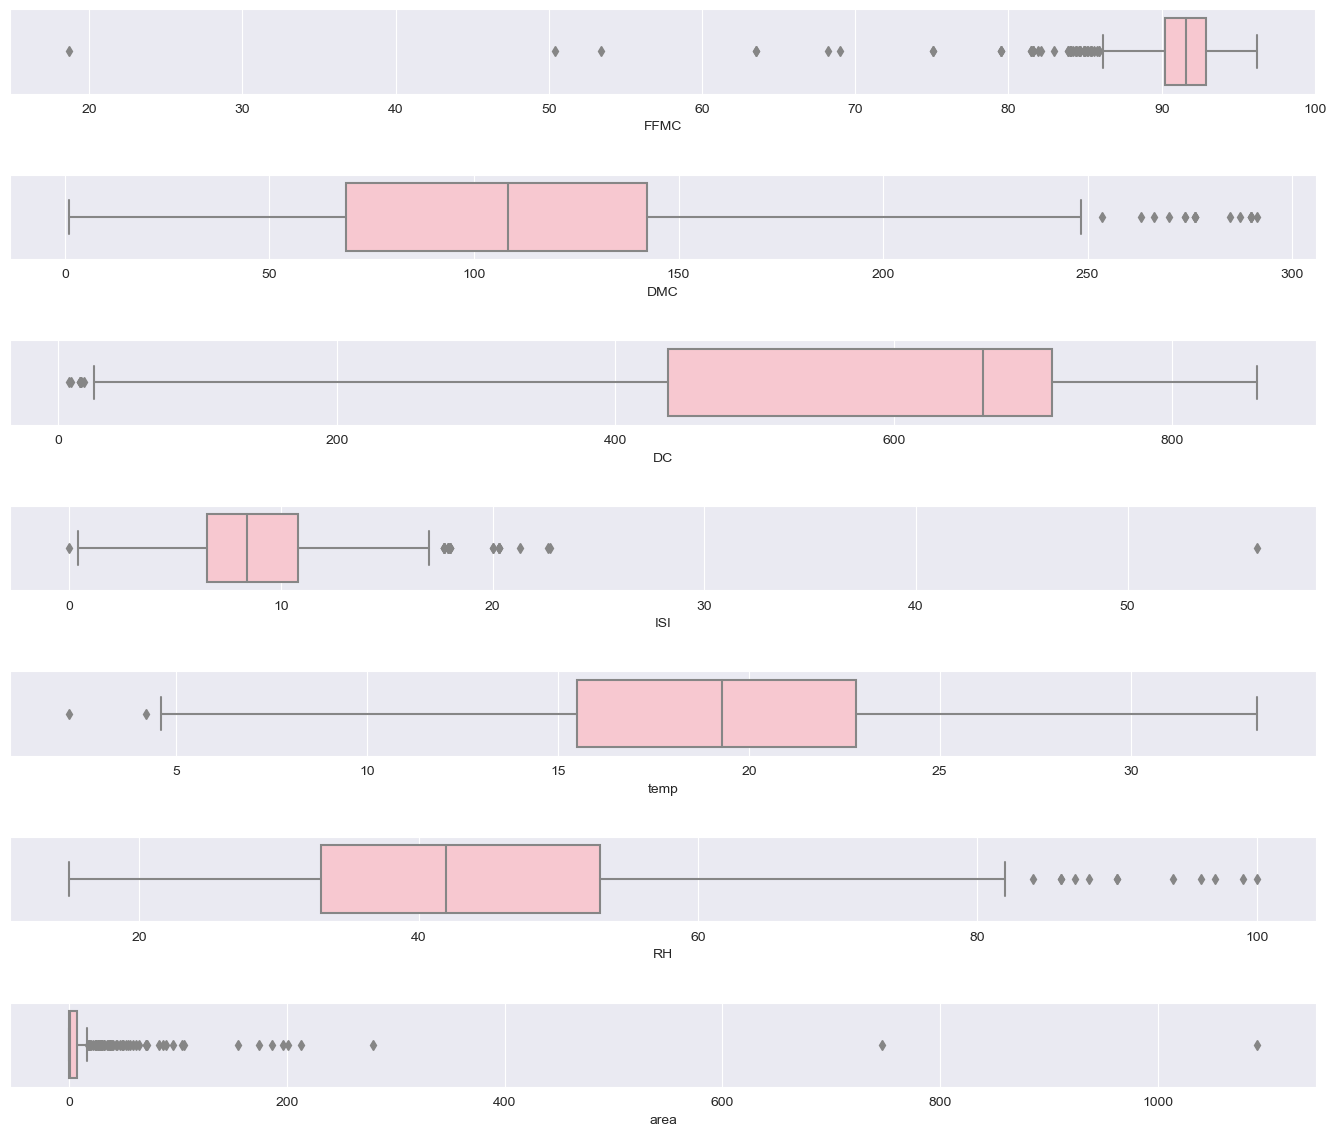

In [62]:
ot=df.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=ot,palette=["pink"],ax=axes[0])
sns.boxplot(x='DMC',data=ot,palette=["pink"],ax=axes[1])
sns.boxplot(x='DC',data=ot,palette=["pink"],ax=axes[2])
sns.boxplot(x='ISI',data=ot,palette=["pink"],ax=axes[3])
sns.boxplot(x='temp',data=ot,palette=["pink"],ax=axes[4])
sns.boxplot(x='RH',data=ot,palette=["pink"],ax=axes[5])
sns.boxplot(x='area',data=ot,palette=["pink"],ax=axes[6])
plt.tight_layout(pad=3.0)

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/1185177919.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df['area'],shade=True,color='g')


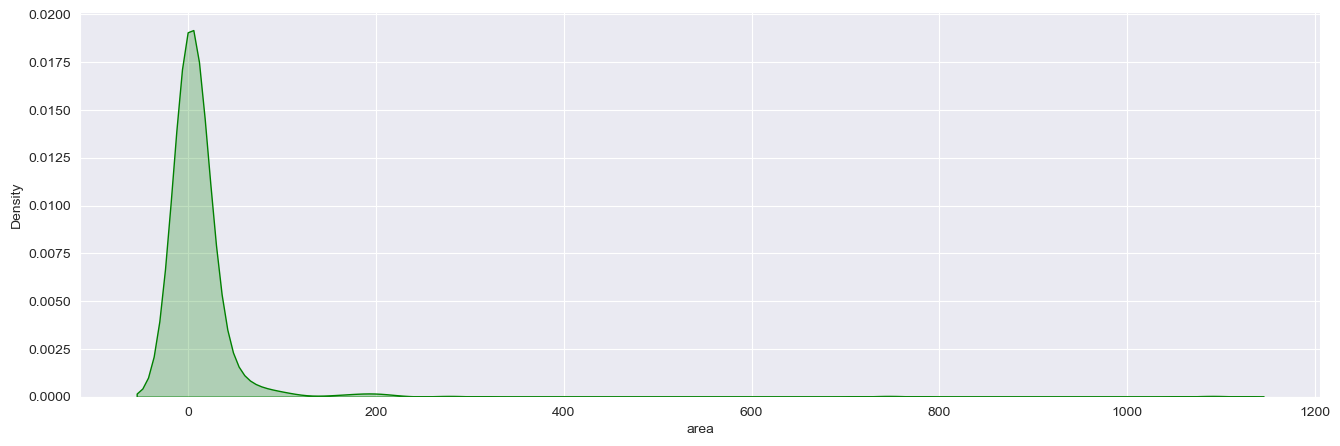

In [63]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['area'].skew()))
print("Kurtosis: {}".format(df['area'].kurtosis()))
ax = sns.kdeplot(df['area'],shade=True,color='g')
plt.show()

In [64]:
raw_df = df[["month", "day", "FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain"]]

In [65]:
raw_df.corr()

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/1974115781.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_df.corr()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000


/Users/haribparol/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


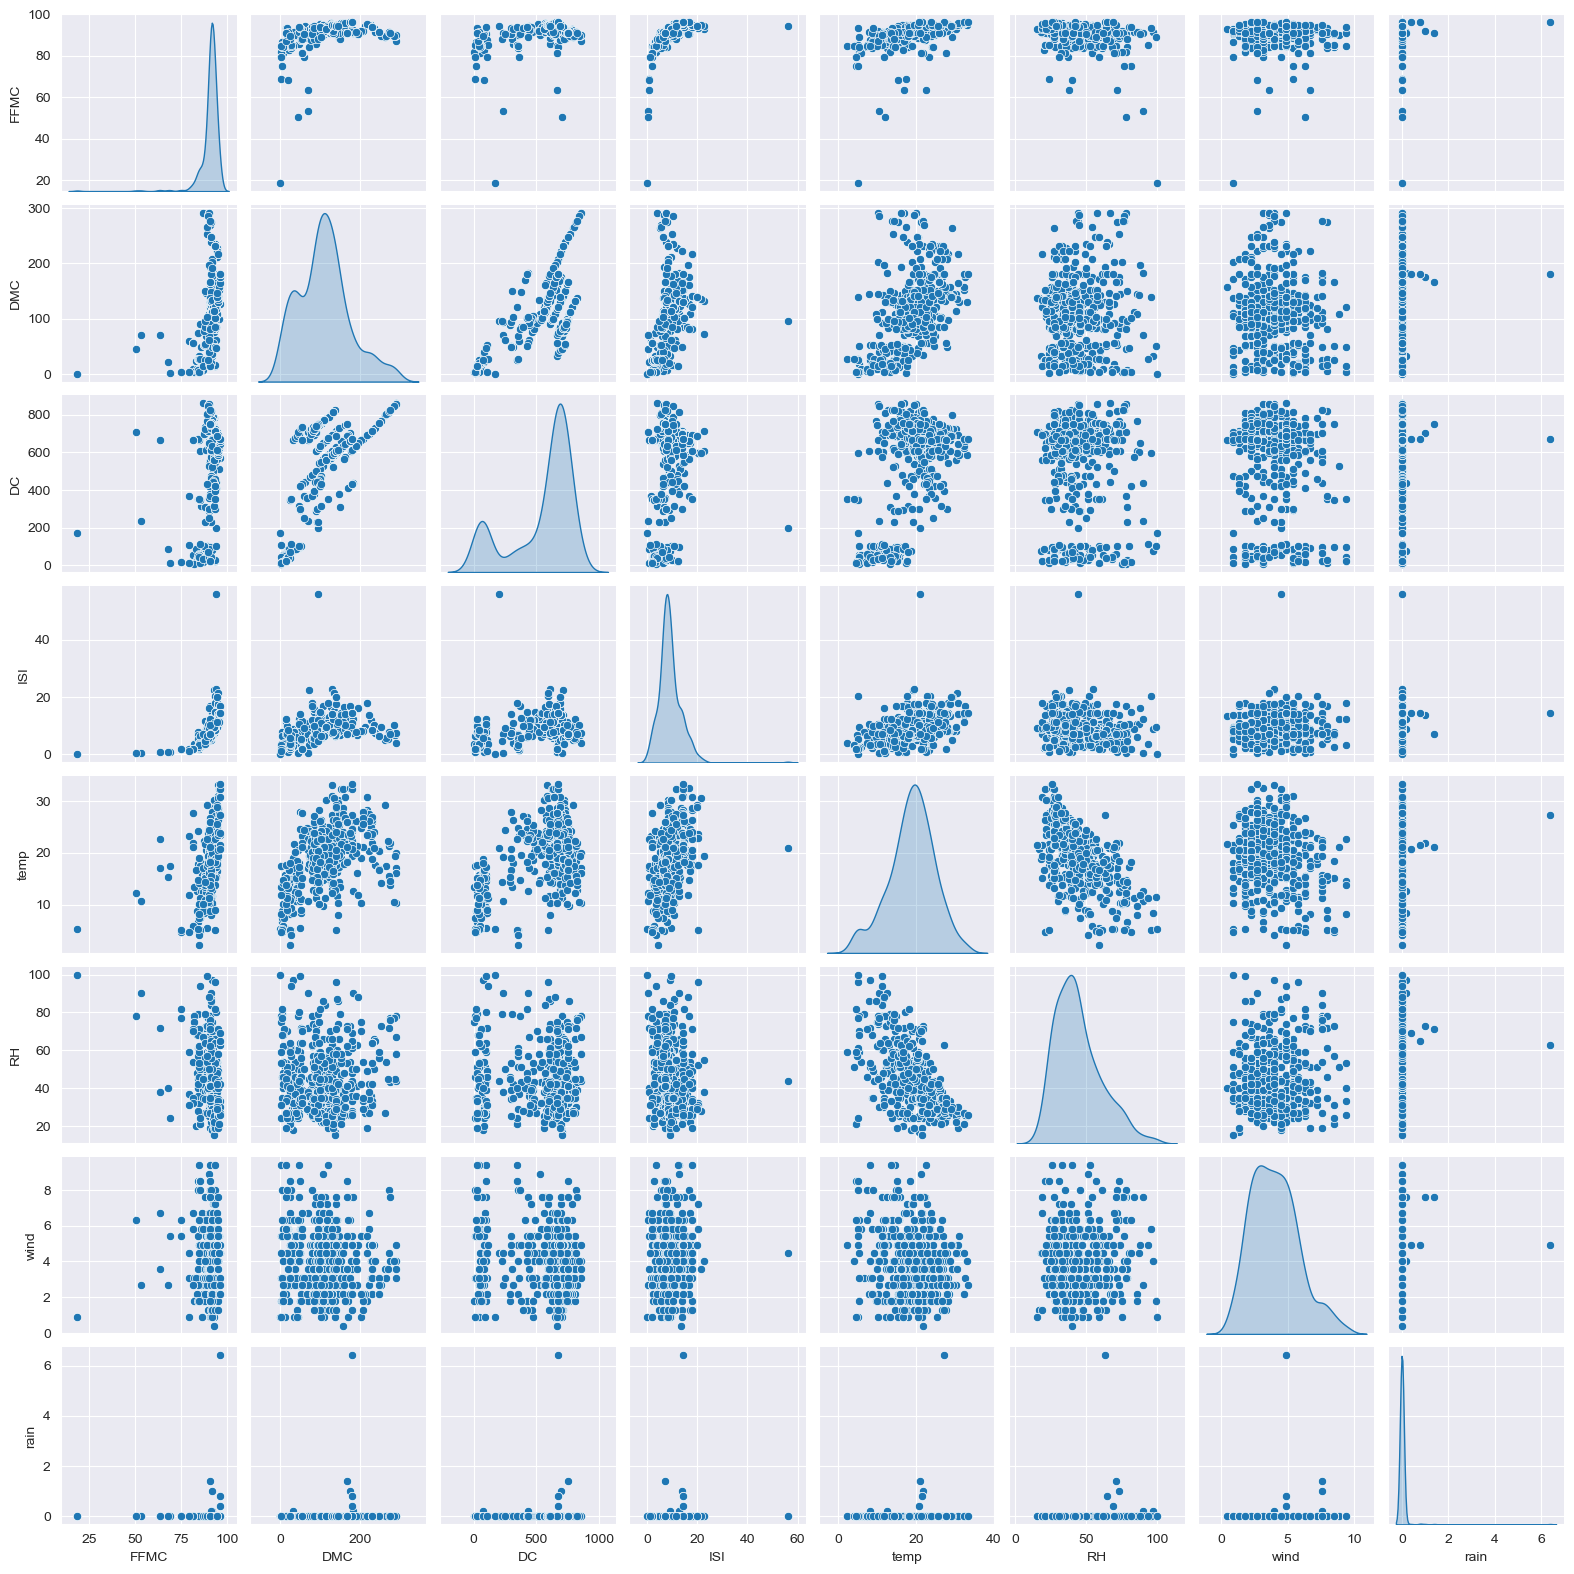

In [66]:
sns.pairplot(raw_df,size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/1525784057.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr(),annot=True,cmap="jet")


<Axes: >

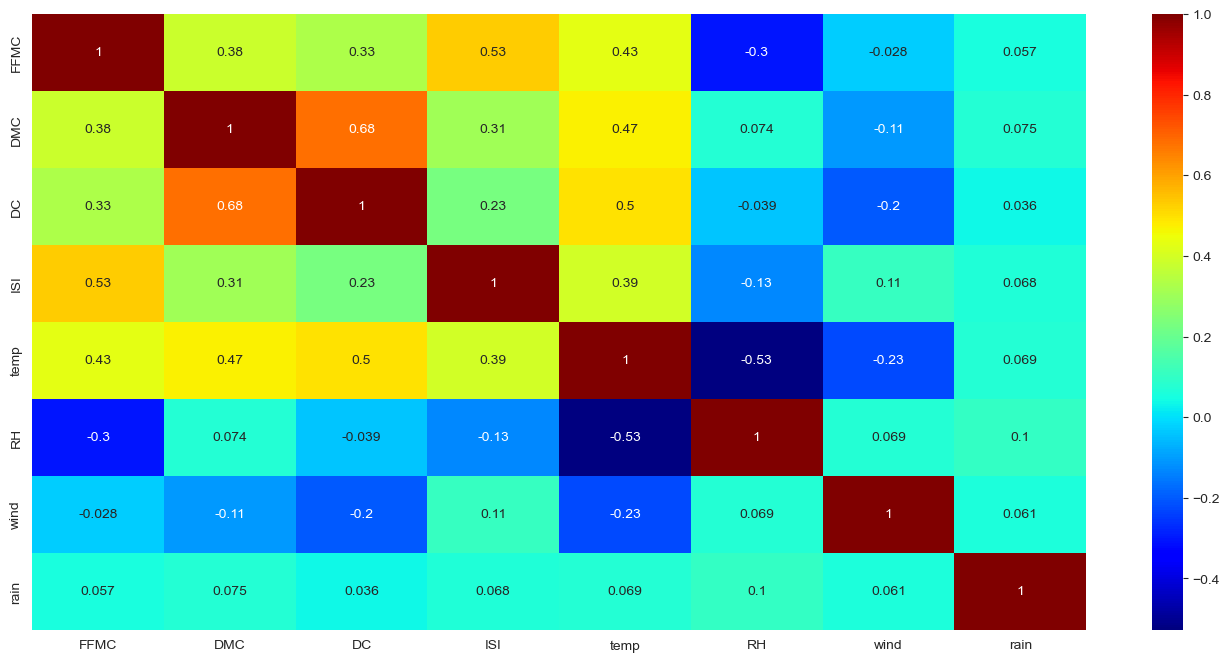

In [67]:
plt.figure(figsize=[17,8])
sns.heatmap(raw_df.corr(),annot=True,cmap="jet")

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_79273/2038100173.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, fmt='.1f',cmap="jet")


<Axes: >

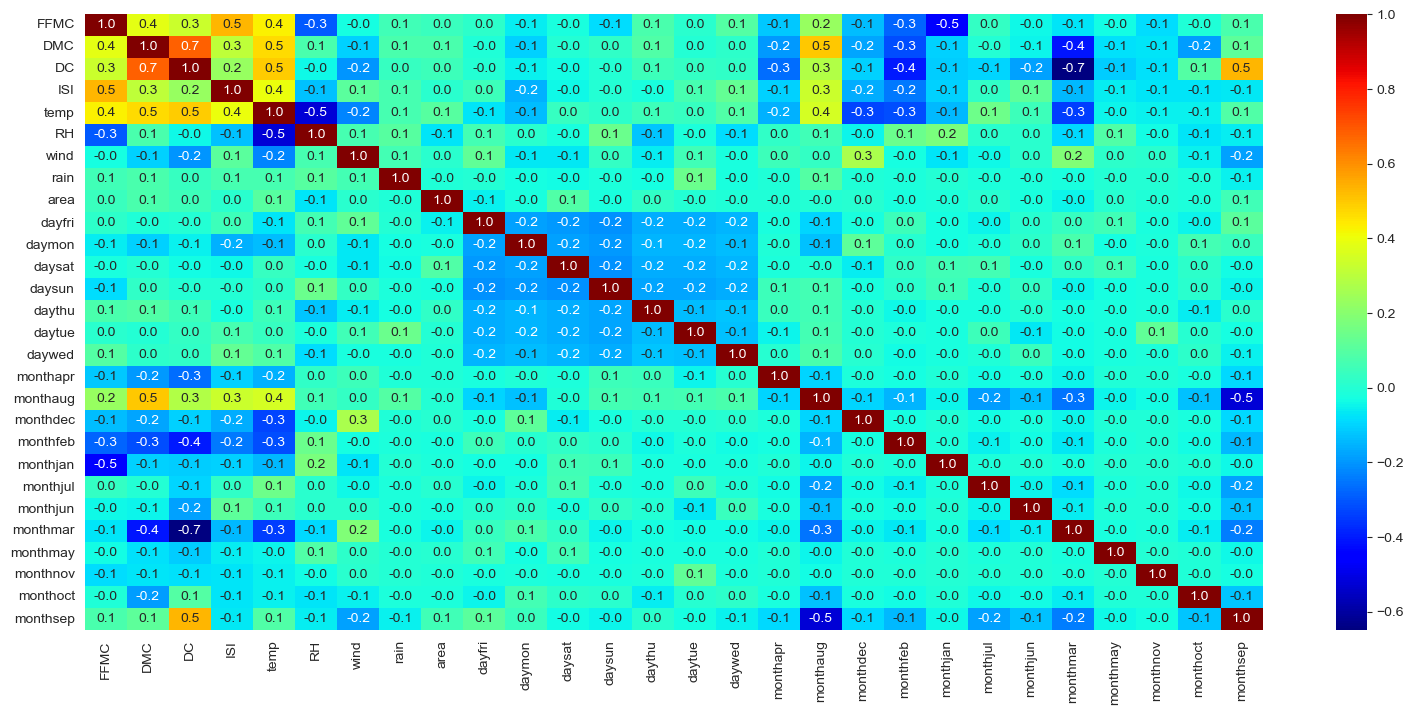

In [68]:
plt.figure(figsize=[19,8])
sns.heatmap(df.corr(),annot=True, fmt='.1f',cmap="jet")


In [69]:
df1=df.copy()

In [70]:
df1.drop(labels=['month','day'],axis=1,inplace=True)

In [71]:
mapping = {'small': 1, 'large': 2}
df1=df1.replace(mapping)

## 

In [72]:
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,2
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,2
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,2
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


# MODEL BUILDING 

In [73]:
X=np.array(df1.drop(labels='size_category',axis=1))

In [74]:
y=np.array(df1['size_category'])

In [75]:
X.shape

(517, 28)

In [76]:
y.shape


(517,)

In [77]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [78]:
X_norm = norm_func(X)

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test= train_test_split(X_norm,y, test_size=0.2,stratify = y)

In [81]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [82]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 12)                348       
                                                                 
 dense_16 (Dense)            (None, 8)                 104       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
model.fit(x_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
 1/42 [..............................] - ETA: 13s - loss: 0.5457 - accuracy: 0.6000

2023-03-26 11:41:05.522167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


42/42 [==============================] - 1s 10ms/step - loss: 0.3915 - accuracy: 0.7215
Epoch 2/50
42/42 [==============================] - 0s 7ms/step - loss: 0.0364 - accuracy: 0.7312
Epoch 3/50
42/42 [==============================] - 0s 7ms/step - loss: -0.3626 - accuracy: 0.7312
Epoch 4/50
42/42 [==============================] - 0s 8ms/step - loss: -0.7765 - accuracy: 0.7312
Epoch 5/50
42/42 [==============================] - 0s 7ms/step - loss: -1.2061 - accuracy: 0.7312
Epoch 6/50
42/42 [==============================] - 0s 7ms/step - loss: -1.7615 - accuracy: 0.7312
Epoch 7/50
42/42 [==============================] - 0s 8ms/step - loss: -2.4560 - accuracy: 0.7312
Epoch 8/50
42/42 [==============================] - 0s 7ms/step - loss: -3.4240 - accuracy: 0.7312
Epoch 9/50
42/42 [==============================] - 0s 7ms/step - loss: -4.6522 - accuracy: 0.7312
Epoch 10/50
42/42 [==============================] - 0s 7ms/step - loss: -6.2062 - accuracy: 0.7312
Epoch 11/50
42/42 [==

In [85]:
result = model.evaluate(x=x_test,y=y_test)
result

4/4 [==============================] - 0s 19ms/step - loss: -661.6744 - accuracy: 0.7308


2023-03-26 11:41:20.607509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[-661.6744384765625, 0.7307692766189575]

In [86]:
print('Model Accuracy : ',round(result[1],2))
print('Loss           : ',round(result[0],2))

Model Accuracy :  0.73
Loss           :  -661.67


# HYPER PARAMETER TUNING 

In [87]:
#This code is using Keras Tuner to perform hyperparameter tuning on a neural network model.
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='forest fire')

INFO:tensorflow:Reloading Oracle from existing project project/forest fire/oracle.json
INFO:tensorflow:Reloading Tuner from project/forest fire/tuner0.json


In [88]:
#The tuner.search_space_summary() 
#function prints out a summary of the hyperparameters 
#that will be tuned during the search.
tuner.search_space_summary()

Search space summary
Default search space size: 17
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [89]:
# below function is being used to search for the best 
#hyperparameters given a set of training and validation data.
tuner.search(x_train, y_train,epochs=10,validation_data=(x_test, y_test))


INFO:tensorflow:Oracle triggered exit


In [90]:
tuner.results_summary()

Results summary
Results in project/forest fire
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 3
units_0: 96
units_1: 64
learning_rate: 0.001
units_2: 32
Score: 0.2609466115633647
Trial summary
Hyperparameters:
num_layers: 11
units_0: 64
units_1: 64
learning_rate: 0.001
units_2: 64
units_3: 32
units_4: 96
units_5: 64
units_6: 32
units_7: 96
units_8: 64
units_9: 32
units_10: 32
units_11: 96
units_12: 32
units_13: 96
units_14: 64
Score: 0.2625186542669932
Trial summary
Hyperparameters:
num_layers: 15
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
Score: 0.26561011870702106
Trial summary
Hyperparameters:
num_layers: 15
units_0: 64
units_1: 96
learning_rate: 0.01
units_2: 96
units_3: 96
units_4: 64
units_5: 32
units_6: 96
units_7: 96
units_8: 64
units_9: 32
units_10: 96
units_11: 96
units_12: 64
units_13: 96
units_1

Based on the results, the best performing model is Trial 10, with the following hyperparameters:

num_layers: 14
units_0: 32
units_1: 32
learning_rate: 0.01
units_2: 64
units_3: 64
units_4: 64
units_5: 64
units_6: 64
units_7: 96
units_8: 96
units_9: 96
units_10: 96
units_11: 96
units_12: 96
units_13: 224
This model achieved a score of 0.7030212588310242.